In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/predict_github_issues_embold_sponsored_hackathon/Embold_Participant%27s_Dataset.zip

--2020-10-17 18:01:52--  https://machinehack-be.s3.amazonaws.com/predict_github_issues_embold_sponsored_hackathon/Embold_Participant%27s_Dataset.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.64.112
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.64.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102320961 (98M) [application/octet-stream]
Saving to: ‘Embold_Participant's_Dataset.zip’

Embold_Participant' 100%[===================>]  97.58M  23.6MB/s    in 4.1s    

2020-10-17 18:01:57 (23.6 MB/s) - ‘Embold_Participant's_Dataset.zip’ saved [102320961/102320961]



In [ ]:
ls

"Embold_Participant's_Dataset.zip"   sample_data/


In [ ]:
!unzip "Embold_Participant's_Dataset.zip"

Archive:  Embold_Participant's_Dataset.zip
   creating: Embold_Participant's_Dataset/
  inflating: Embold_Participant's_Dataset/sample submission.csv  
  inflating: __MACOSX/Embold_Participant's_Dataset/._sample submission.csv  
  inflating: Embold_Participant's_Dataset/embold_train_extra.json  
  inflating: __MACOSX/Embold_Participant's_Dataset/._embold_train_extra.json  
  inflating: Embold_Participant's_Dataset/embold_test.json  
  inflating: __MACOSX/Embold_Participant's_Dataset/._embold_test.json  
  inflating: Embold_Participant's_Dataset/embold_train.json  
  inflating: __MACOSX/Embold_Participant's_Dataset/._embold_train.json  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install rfpimp
!pip install catboost
from sklearn.metrics import mean_absolute_error,accuracy_score
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV,GroupKFold,train_test_split,StratifiedShuffleSplit
from rfpimp import *
from tqdm import tqdm
from catboost import *
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from fastai.text import *
from fastai.imports import *
from fastai.text import *
from fastai import *
%matplotlib inline

from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.metrics import *
from catboost import CatBoostClassifier
import nltk
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

     |████████████████████████████████| 163kB 3.9MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10261 sha256=8ea97ac54b40ea88433a4e607ac20d5f2aa6e41c2ab6e4163d666c6c811c0da1
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.5-cp36-none-any.whl size=35033 sha256=343fe13e627c60810d955cf06cccabecc5250fa8afdf258d34c36835a1fca8a5
  Stored in directory: /root/.cache/pip/wheels/6e/28/de/a84563cfe761afd6c628e595590455412e26a6c4d587289d7b
Successfully built rfpimp stratx
     |████████████████████████████████| 66.2MB 57kB/s 
     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 1.1MB 6.7MB/s 
     |████████████████████████████████| 1.1MB 15.8MB/s 
     |████████████████████████████████| 890kB 27.4MB/s 
     |████████████████████████████████| 3.0MB 37.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_trans

In [ ]:
sns.set_style('darkgrid')
import os
from fastai.text import *
from fastai.imports import *
from fastai.text import *
from fastai import *

In [ ]:
train=pd.read_json("/content/Embold_Participant's_Dataset/embold_train.json")
traine=pd.read_json("/content/Embold_Participant's_Dataset/embold_train_extra.json")
test=pd.read_json("/content/Embold_Participant's_Dataset/embold_test.json")
sub=pd.read_csv("/content/Embold_Participant's_Dataset/sample submission.csv")

In [ ]:
train.head(5)

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


In [ ]:
traine.head(5)

,title,body,label
0,use a 8bit typeface,since this is meant to emulate some old arcade...,1
1,implement wireless m-bus binding,_from chris.pa...@googlemail.com https://cod...,1
2,add multilang support for timeago.js,currently it is only en . \r required to add ...,1
3,scaleway - seg-fault on shutdown,tbr irc creates a new scaleway instance with...,0
4,sistema de pintura: no se guardar los nuevos p...,este sp ya estaba asignado a un carro y se enc...,0


In [ ]:
test.head(5)

,title,body
0,config question path-specific environment var...,issue description or question\r \r hey @artemg...
1,crash indien vol,de simulator crasht als hij vol zit
2,unable to mine rocks,"sarkasmo starting today, when i hit enter act..."
3,not all whitelists are processed,create following rules... order of creation is...
4,add ctx menu for idafree 70 and idafree 5,"associated with .dll, .dll_, .exe, .exe_, .sc,..."


In [ ]:
sub.head(5)

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
train.isnull().sum(),traine.isnull().sum(),test.isnull().sum(),train.shape,traine.shape,test.shape,train.dtypes

(title    0
 body     0
 label    0
 dtype: int64, title    0
 body     0
 label    0
 dtype: int64, title    0
 body     0
 dtype: int64, (150000, 3), (300000, 3), (30000, 2), title    object
 body     object
 label     int64
 dtype: object)

In [ ]:
train=train.append(traine,ignore_index=True)

In [ ]:
train.head(5)

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


In [ ]:
train.shape

(450000, 3)

In [ ]:
train=train.sample(frac =.30) 



# method-1 (fastai+bert)

In [ ]:
train['text']=train['title']+' '+train['body']
test['text']=test['title']+' '+test['body']
del train['title']
del test['title']
del train['body']
del test['body']
train['target']=train['label']
del train['label']

In [ ]:
train['target'].value_counts()

1    62238
0    60164
2    12598
Name: target, dtype: int64

In [ ]:
train.isnull().sum(),test.isnull().sum()

(text      0
 target    0
 dtype: int64, text    0
 dtype: int64)

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

In [ ]:
def random_seed(seed_value):
    import random 
    random.seed(seed_value)  
    import numpy as np
    np.random.seed(seed_value)  
    import torch
    torch.manual_seed(seed_value)  
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  
        torch.backends.cudnn.deterministic = True   
        torch.backends.cudnn.benchmark = False

In [ ]:
path = Path("/content/")
path.ls()

[PosixPath('/content/.config'),
 PosixPath("/content/Embold_Participant's_Dataset.zip"),
 PosixPath('/content/__MACOSX'),
 PosixPath("/content/Embold_Participant's_Dataset"),
 PosixPath('/content/sample_data')]

In [ ]:
from sklearn.metrics import accuracy_score 
y_pred_totcb = []
c=[]
from sklearn.model_selection import KFold, RepeatedKFold
fold = KFold(n_splits=2, shuffle=True, random_state=0)
i=1

for train_index, test_index in fold.split(train):
    
    train_df = train.iloc[train_index]
    valid_df = train.iloc[test_index]

    random_seed(42)
    
    data_lm = TextLMDataBunch.from_df(Path(path), train_df, valid_df, test, text_cols=[0], bs=32)
    data_clas = TextClasDataBunch.from_df(Path(path), train_df, valid_df, test, text_cols=[0], label_cols=1, bs=32)
    
    learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4, model_dir='/tmp/model/')
    learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))
    learn.unfreeze()
    learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))
    learn.save_encoder('model_enc')
    
    learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.4, model_dir='/tmp/model/')
    learn.load_encoder('model_enc')
    learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))
    learn.freeze_to(-2)
    learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
    learn.freeze_to(-1)
    learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
    learn.unfreeze()
    learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
   
    log_preds, test_labels = learn.get_preds(ds_type=DatasetType.Test, ordered=True)
    preds = np.argmax(log_preds, 1)
    c.append(log_preds)
    y_pred_totcb.append(preds)
    print(f'fold {i} completed')
    i = i+1

epoch,train_loss,valid_loss,accuracy,time
0,4.423514,3.925154,0.369066,40:38


epoch,train_loss,valid_loss,accuracy,time
0,3.734439,3.452304,0.425530,44:21


epoch,train_loss,valid_loss,accuracy,time
0,0.634523,0.545174,0.785259,17:09


epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [ ]:
df = pd.DataFrame()
for i in range(1):
    col_name = 'SECTION_' + str(i)
    df[col_name] =  y_pred_totcb[i]

In [ ]:
df.tail()

,SECTION_0
29995,0
29996,0
29997,0
29998,0
29999,1


In [ ]:
sub = pd.DataFrame()
sub['label'] = df.mode(axis=1)[0]
sub.tail()

,label
29995,0
29996,0
29997,0
29998,0
29999,1


In [ ]:
m=[]
for i in range(30000):
  xx=df['SECTION_0'][i]
  yy=df['SECTION_1'][i]
  zz=min(xx,yy)
  m.append(zz)

In [ ]:
sub['label']=

NameError: ignored

In [ ]:
sub.to_csv('bertcz.csv',index=False)

# S mode

In [ ]:
df = pd.concat([train, test]).reset_index()

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
df.nunique(),df.shape

(title    179519
 body     180000
 label         3
 dtype: int64, (180000, 3))

In [ ]:
import string
punctuation=string.punctuation
df['title_umerics'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['title_upper'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['title_punctuation_count'] = df['title'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
import string
punctuation=string.punctuation
df['body_umerics'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['body_upper'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['body_punctuation_count'] = df['body'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

df['title'] = df['title'].apply(clean_text)
df['body'] = df['body'].apply(clean_text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
punctuation=string.punctuation
df['title_word_count']=df['title'].apply(lambda x: len(str(x).split(" ")))
df['title_char_count'] = df['title'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/1+len(words))

df['title_avg_word'] = df['title'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['title_stopwords'] = df['title'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['title_numerics'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['title_upper'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['title_word_density'] = df['title_char_count'] / (df['title_word_count']+1)
df['title_punctuation_count'] = df['title'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
import string
punctuation=string.punctuation
df['body_word_count']=df['body'].apply(lambda x: len(str(x).split(" ")))
df['body_char_count'] = df['body'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/1+len(words))

df['body_avg_word'] = df['body'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['body_stopwords'] = df['body'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['body_numerics'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['body_upper'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['body_word_density'] = df['body_char_count'] / (df['body_word_count']+1)
df['body_punctuation_count'] = df['body'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
cvec = TfidfVectorizer(max_features=350, norm = 'l1', lowercase=True, smooth_idf=False, sublinear_tf=False, ngram_range=(1,4), tokenizer=TreebankWordTokenizer().tokenize)
df_info = pd.DataFrame(cvec.fit_transform(df['title']).todense())
df_info.columns = ['title_Top_' + str(c) for c in df_info.columns]
df = pd.concat([df, df_info], axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
cvec = TfidfVectorizer(max_features=100, norm = 'l1', lowercase=True, smooth_idf=False, sublinear_tf=False, ngram_range=(1,4), tokenizer=TreebankWordTokenizer().tokenize)
df_info = pd.DataFrame(cvec.fit_transform(df['body']).todense())
df_info.columns = ['body_Top_' + str(c) for c in df_info.columns]
df = pd.concat([df, df_info], axis=1)

In [ ]:
from textblob import TextBlob
df['title_polarity'] = df.apply(lambda x: TextBlob(x['title']).sentiment.polarity, axis=1)
df['title_subjectivity'] = df.apply(lambda x: TextBlob(x['title']).sentiment.subjectivity, axis=1)

In [ ]:
from textblob import TextBlob
df['body_polarity'] = df.apply(lambda x: TextBlob(x['body']).sentiment.polarity, axis=1)
df['body_subjectivity'] = df.apply(lambda x: TextBlob(x['body']).sentiment.subjectivity, axis=1)

In [ ]:
j=[]
for i in df['title']:
  j.append(len(i))
df['title_len']=j
j=[]
for i in df['body']:
  j.append(len(i))
df['body_len']=j

In [ ]:
del df['title']
del df['body']
train = df[df['label'].isnull()==False]
test = df[df['label'].isnull()==True]
del test['label']

In [ ]:
train_df = df[df.label.notnull()]
test_df = df[df.label.isnull()]

In [ ]:
X, y = train_df.drop(['label'], axis=1), train_df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
model_cat = CatBoostClassifier(depth=10,od_type='Iter', iterations=10000, task_type='GPU',eval_metric='Accuracy',bootstrap_type='Bayesian',od_wait=1000)
model_cat.fit(X_train, y_train.astype(int),
              eval_set=(X_test, y_test.astype(int)),
              early_stopping_rounds=200,
)

Learning rate set to 0.063095
0:	learn: 0.6650667	test: 0.6611333	best: 0.6611333 (0)	total: 213ms	remaining: 35m 32s
1:	learn: 0.6780963	test: 0.6752667	best: 0.6752667 (1)	total: 359ms	remaining: 29m 56s
2:	learn: 0.6822148	test: 0.6807333	best: 0.6807333 (2)	total: 461ms	remaining: 25m 34s
3:	learn: 0.6787852	test: 0.6738667	best: 0.6807333 (2)	total: 572ms	remaining: 23m 49s
4:	learn: 0.6814963	test: 0.6774000	best: 0.6807333 (2)	total: 681ms	remaining: 22m 40s
5:	learn: 0.6812148	test: 0.6774667	best: 0.6807333 (2)	total: 787ms	remaining: 21m 51s
6:	learn: 0.6819481	test: 0.6778667	best: 0.6807333 (2)	total: 898ms	remaining: 21m 22s
7:	learn: 0.6849852	test: 0.6808667	best: 0.6808667 (7)	total: 1.01s	remaining: 20m 57s
8:	learn: 0.6878667	test: 0.6828667	best: 0.6828667 (8)	total: 1.12s	remaining: 20m 39s
9:	learn: 0.6914148	test: 0.6858667	best: 0.6858667 (9)	total: 1.23s	remaining: 20m 26s
10:	learn: 0.6921630	test: 0.6857333	best: 0.6858667 (9)	total: 1.34s	remaining: 20m 14s
1

In [ ]:
prediction = model_cat.predict(test_df[X_train.columns])
submission = pd.DataFrame(prediction, columns=['label'])
submission.to_csv('nowed.csv', index=False)
submission

,label
0,2
1,0
2,0
3,0
4,1
...,...
29995,0
29996,0
29997,0
29998,0


# Roberta

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 5.5MB/s 
     |████████████████████████████████| 317kB 19.4MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 1.7MB 23.8MB/s 
     |████████████████████████████████| 7.4MB 49.4MB/s 
     |████████████████████████████████| 163kB 54.5MB/s 
     |████████████████████████████████| 122kB 59.4MB/s 
     |████████████████████████████████| 102kB 16.0MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
     |████████████████████████████████| 112kB 50.2MB/s 
     |████████████████████████████████| 4.4MB 50.3MB/s 
     |████████████████████████████████| 6.7MB 28.4MB/s 
     |████████████████████████████████| 133kB 60.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 122kB 49.7MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
  Created wheel for seqeval: filename=seqeval-1.0.0-cp36-none-any.whl size=14022 sha256=d93c79104de0afe20f24f

In [ ]:
sample_sub =pd.read_csv("/content/Embold_Participant's_Dataset/sample submission.csv")

In [ ]:
target = sample_sub.columns.tolist()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import *

from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')
import gc
from scipy.special import softmax

from simpletransformers.classification.classification_model import ClassificationModel
from sklearn.metrics import mean_squared_error as mse

In [ ]:
train.head(2)

,text,target
0,y-zoom piano roll a y-zoom on the piano roll w...,1
1,buggy behavior in selection ! screenshot from ...,0


In [ ]:
test.head(2)

,text
0,config question path-specific environment var...
1,crash indien vol de simulator crasht als hij v...


In [ ]:
def get_model(model_type, model_name, n_epochs = 2, train_batch_size = 112, eval_batch_size = 144, seq_len = 134, lr = 2e-5):
  model = ClassificationModel(model_type, model_name,num_labels=1, args={'train_batch_size':train_batch_size,
                                                                         "eval_batch_size": eval_batch_size,
                                                                         'reprocess_input_data': True,
                                                                         'overwrite_output_dir': True,
                                                                         'fp16': False,
                                                                         'do_lower_case': False,
                                                                         'num_train_epochs': n_epochs,
                                                                         'max_seq_length': seq_len,
                                                                         'regression': True,
                                                                         'manual_seed': 2,
                                                                         "learning_rate":lr,
                                                                         "save_eval_checkpoints": False,
                                                                         "save_model_every_epoch": False,})
  return model

In [ ]:
tmp = pd.DataFrame()
tmp['text'] = train['text']
tmp['labels'] = train['target']
tmp_test = test[['text']].rename({'text': 'text'}, axis=1)
tmp_test['labels'] = 0
tmp_trn, tmp_val = train_test_split(tmp, test_size=0.15, random_state=2)

In [ ]:
model = get_model('roberta', 'roberta-base', n_epochs=3)
import torch
torch.cuda.empty_cache()
model.train_model(tmp_trn)
import torch
torch.cuda.empty_cache()
preds_val = model.eval_model(tmp_val)[1]
preds_val = np.clip(preds_val, 0, 2)
print(f"RMSE: {mse(tmp_val['labels'], preds_val)**0.5}")
test_preds = model.eval_model(tmp_test)[1]
test_preds = np.clip(test_preds, 0, 2)
pv_1 = preds_val
pt_1 = test_preds


RMSE: 0.9120916133322964


In [ ]:
!nvidia-smi

Sun Oct 11 10:42:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
data = (TextList.from_df(train, cols='text')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,there are some misread bases the primer region leading those two sequences being considered distinct xxunk the same time while exporting the clusters combined cluster size sum rpm all cluster members not calculated and the export text file filtered via export xxunk based not cluster total rpm but the number distinct members who can differ both the random region the primer regions leads situation when theoretically you get cluster with
1,view layout view java tat android view viewgroup layout viewgroup java tat android widget relativelayout onlayout relativelayout java tat android view view layout view java tat android view viewgroup layout viewgroup java tat android support view viewpager onlayout viewpager java tat android view view layout view java tat android view viewgroup layout viewgroup java tat android support design widget coordinatorlayout xxunk coordinatorlayout java tat android support design widget coordinatorlayout xxunk
2,starting required daemons for nfs rpc xxunk portmap rpcbind and rpc statd available started rpc xxunk rpcbind rpc xxunk rpcbind available started rpc statd rpc status rpc statd available started rpc xxunk including verify netfs default mount netfs path mkdir created directory tmp rear qzsrsjsmc outputfs mounting with mount nfs noatime server export nfs tmp rear qzsrsjsmc outputfs mount nfs timeout set for tue may mount nfs trying text based
3,path etrago venv lib python site packages pyomo opt solver xxunk line process output self process xxunk file results file path etrago venv lib python site packages pyomo solvers plugins solvers glpk line process xxunk file raise valueerror msg valueerror error parsing solution data file line seems fail the very first line the glpk xxunk file which min additionally receive the following warnings data for xxunk column set series set
4,tab should playing xxbos information about resolution preconditioner would interesting get during the run time informations about the algebraic resolution time iteration number iterations and able save file this could especially interesting with the use the new house xxunk pcd xxbos bitcoins disappeared after reopening electrum hey folks bitcoins disappeared after reopening electrum yesterday imported few private keys what deleted after imported because always was fine and btc shown wallet


In [ ]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [ ]:

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,6.414704,6.019563,0.146083,11:05


KeyboardInterrupt: ignored

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.load('stage-1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (180000 items)
x: LMTextList
xxbos add option pin unpin package from conda cli conda pin package names conda unpin package names,xxbos exclude xxunk from sequence comparison was pretty surprised find out that the clustering algorithm differentiates between sequences with the same random region and different primer regions xxunk example xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk these two sequences belonging the same clusters the random region xxunk the same while there are some misread bases the primer region leading those two sequences being considered distinct xxunk the same time while exporting the clusters combined cluster size sum rpm all cluster members not calculated and the export text file filtered via export xxunk based not cluster total rpm but the number distinct members who can differ both the random region the primer regions leads situation when theoretically you get cluster with members each with rp

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


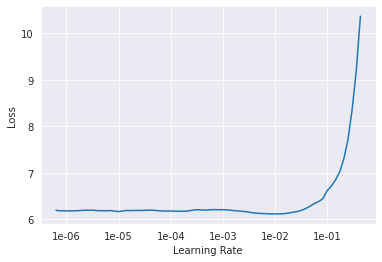

In [ ]:
learn.recorder.plot()

In [ ]:
data_clas = (TextList.from_df(train, cols='text', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols='target')
             .add_test(test)
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos when log url code fcf appdevdesigns net page xxunk code browser code mozilla macintosh intel mac applewebkit khtml like gecko version safari code user code cde code note when log lists activities under should list activities that been tagged someone else has already entered the activity and uploaded few photos and tagged those photos would they should they show here guessing that because this entire area blank for username,2
xxbos openstack ssa error notimplementederror type cast just error logs ssa finishes error task agent job state miq miqqueue deliver message error notimplementederror error task agent job state notimplementederror notimplementederror method rescue deliver error task agent job state home ladas rvm gems ruby bundler gems rails activerecord lib active record attribute type cast home ladas rvm gems ruby bundler gems rails activerecord lib active record attribute original value home ladas,0
xxbos part plugin does not build with fastbit support mac recently rebuilt all libraries using build visit all this built support for fastbit when build visit itself the build fails part reader due array type problems users whitlock development trunk src databases part timestep error array was not declared this scope users whitlock development trunk src databases part timestep error expected xxunk before token users whitlock development trunk src databases,0
xxbos cargo test doesn work text error linking with failed exit code note needed xxunk home steve multirust toolchains nightly unknown linux gnu lib rustlib unknown linux gnu lib home steve src intermezzos kernel target debug deps intermezzos home steve src intermezzos kernel target debug deps intermezzos sections pie xxunk home steve src intermezzos kernel target debug deps home steve src intermezzos kernel target debug build intermezzos bcb out home,0
xxbos build for windows xxunk platform failed with some jar packages not available trying build the latest develop branch kura for windows platform but with failure like below info downloading addons mvn repo org eclipse kura org eclipse kura linux usb snapshot maven metadata xml info configured artifact org eclipse kura org eclipse kura linux usb armv snapshot jar info downloading addons mvn repo org eclipse kura org eclipse kura,2


In [ ]:

learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [ ]:

learn_classifier.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


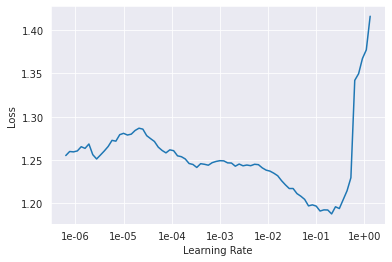

In [ ]:

learn_classifier.recorder.plot()

In [ ]:
learn_classifier.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.922604,0.986125,0.574067,03:52
